In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from code.util import *
from code.modelhelper import *

# MLP w/ Engineered Features

In [2]:
BATCH_SIZE = 512
N_CLASS = 2
EPOCHS = 100

In [3]:
x = np.load("data/x_feat.npy")
y = np.load("data/y_onehot.npy")

In [4]:
x.shape

(127284, 51)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [6]:
print(x.shape, y.shape)

(127284, 51) (127284, 2)


In [7]:
model_input = Input(shape=(x.shape[1], ))
H = Dense(51, activation="relu")(model_input)
H = Dropout(0.2)(H)
H = Dense(51, activation="relu")(model_input)
H = Dropout(0.2)(H)
H = Dense(25, activation="relu")(H)
H = Dropout(0.2)(H)
model_output = Dense(N_CLASS, activation="softmax")(H)

model = Model(inputs=model_input, outputs=model_output)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 51)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 51)                2652      
_________________________________________________________________
dropout_1 (Dropout)          (None, 51)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 4,004
Trainable params: 4,004
Non-trainable params: 0
___________________________________________________________

In [8]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[es]
)

score = model.evaluate(x_test, y_test, verbose=2)

W0820 16:01:38.583230 4566058432 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 89098 samples, validate on 38186 samples
Epoch 1/100
89098/89098 [==============================] - 1s 7us/sample - loss: 0.7404 - accuracy: 0.7818 - val_loss: 0.2807 - val_accuracy: 0.9010
Epoch 2/100
89098/89098 [==============================] - 0s 5us/sample - loss: 0.2791 - accuracy: 0.8987 - val_loss: 0.1889 - val_accuracy: 0.9306
Epoch 3/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.2076 - accuracy: 0.9271 - val_loss: 0.1661 - val_accuracy: 0.9413
Epoch 4/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1807 - accuracy: 0.9384 - val_loss: 0.1578 - val_accuracy: 0.9467
Epoch 5/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1684 - accuracy: 0.9424 - val_loss: 0.1543 - val_accuracy: 0.9474
Epoch 6/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1629 - accuracy: 0.9446 - val_loss: 0.1529 - val_accuracy: 0.9480
Epoch 7/100
89098/89098 [==============================]

In [9]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_model = model.predict(x_test)
y_pred = to_bin(y_pred_model)
print("Test recall: {}".format(recall(y_test, y_pred)))

y_test0 = to_1D(y_test)
y_pred0 = to_1D(y_pred)
print(confusion_matrix(y_test0, y_pred0))

Test loss: 0.1354109292613519
Test accuracy: 0.95150054
Test recall: 0.7810990338164251
[[31160   402]
 [ 1450  5174]]


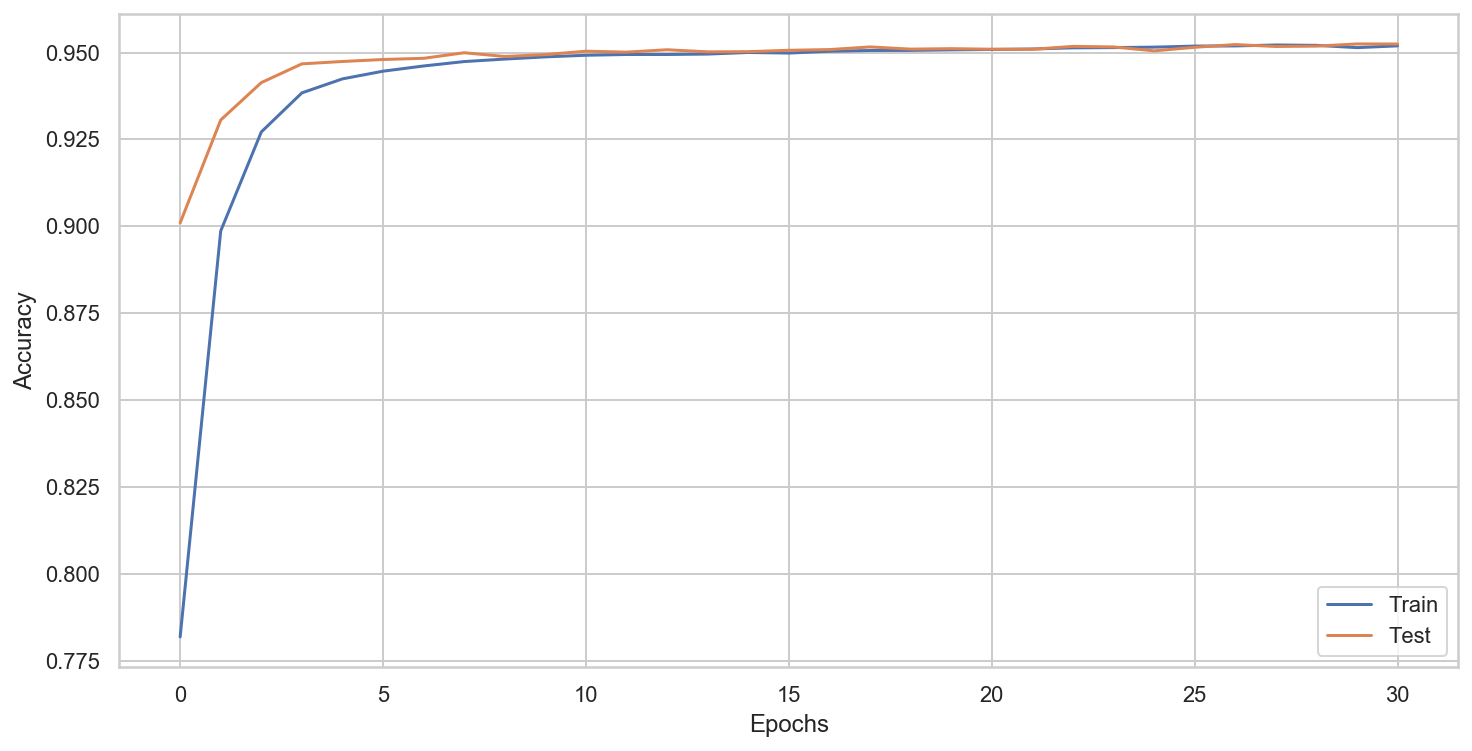

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [11]:
model.save("models/mlp.h5")